In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances
from stepwise_regression import step_reg
from sklearn.feature_selection import mutual_info_regression, f_regression
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet, TheilSenRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor, IsolationForest
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df_bp = pd.read_excel('F:\DATA SCIENCE\ДАТАСЕТы\ВКР (базовая)/X_bp.xlsx')
df_nup = pd.read_excel('F:\DATA SCIENCE\ДАТАСЕТы\ВКР (базовая)/X_nup.xlsx')

In [3]:
df = pd.merge(df_bp, df_nup, how='inner', on='Unnamed: 0')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.index.rename('index', inplace=True)
df.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
index,,,,,,,,,,,,,
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0,4.0,57.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,70.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

In [5]:
df.describe(include='all').round(1)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1023.0,1023.0,1023.0,1023.0,1023.0,1023.0,1023.0,1023.0,1023.0,1023.0,1023.0,1023.0,1023.0
mean,2.9,1975.7,739.9,110.6,22.2,285.9,482.7,73.3,2466.9,218.4,44.3,6.9,57.2
std,0.9,73.7,330.2,28.3,2.4,40.9,281.3,3.1,485.6,59.7,45.0,2.6,12.4
min,0.4,1731.8,2.4,17.7,14.3,100.0,0.6,64.1,1036.9,33.8,0.0,0.0,0.0
25%,2.3,1924.2,500.0,92.4,20.6,259.1,266.8,71.2,2135.9,179.6,0.0,5.1,49.8
50%,2.9,1977.6,739.7,110.6,22.2,285.9,451.9,73.3,2459.5,219.2,0.0,6.9,57.3
75%,3.6,2021.4,961.8,129.7,24.0,313.0,693.2,75.4,2767.2,257.5,90.0,8.6,64.9
max,5.6,2207.8,1911.5,199.0,33.0,413.3,1399.5,82.7,3848.4,414.6,90.0,14.4,104.0


### Рассматривается прочность при растяжении

1 Переименование целевой переменной

In [6]:
df['y_2'] = df['Прочность при растяжении, МПа']
df = df.drop(columns=['Прочность при растяжении, МПа'])

2 Фильтрация шума с помощью маски (ядра) на основе исходного датасета (первые 23 строки)

In [7]:
sc = RobustScaler()    # MinMaxScaler()    RobustScaler()    StandardScaler()
cols = [col for col in df.columns if col != 'y_W']
df[cols] = sc.fit_transform(df[cols])

main_y = df.loc[:22, 'y_2']
other_y = df.loc[23:, 'y_2']
selected_rows = pd.DataFrame(columns=df.columns)

# Отбираем по knn ближайших соседей для каждого наблюдения исходного датасета - первых 23 строк
knn = 3
for y in main_y:
    distances = euclidean_distances(df.iloc[23:], df.iloc[:23].loc[df['y_2'] == y])
    indices = np.argsort(distances, axis=0)[:knn]
    selected_rows = selected_rows.append(df.iloc[indices.flatten() + 23])
    
df = pd.concat([df.loc[:22], selected_rows]).drop_duplicates()

# Второй вариант кода фильтрации шума 
# selected_rows = []

# for x in range(23):
#     distances = euclidean_distances(df.iloc[x:x+1, :], df.iloc[23:, :]).flatten()
#     selected_rows.extend(list(distances.argsort()[:3] + 23))

# df = df.loc[list(range(23)) + selected_rows].drop_duplicates()

df[cols] = sc.inverse_transform(df[cols])

print(df.shape)
df.sort_index()

(76, 13)


,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки,y_2
0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,220.000000,0.0,4.000000,57.000000,3000.000000
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,220.000000,0.0,4.000000,60.000000,3000.000000
2,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,220.000000,0.0,4.000000,70.000000,3000.000000
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,220.000000,0.0,5.000000,47.000000,3000.000000
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,220.000000,0.0,5.000000,57.000000,3000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
936,2.807028,2029.296906,993.859728,74.690667,27.292550,226.555876,547.516759,71.680994,220.732220,90.0,0.037639,59.156843,2528.082238
964,2.695937,1993.544328,402.032452,131.532947,25.275127,338.463813,819.961314,74.977723,311.066777,90.0,7.410758,50.568878,2120.968913
991,1.951224,1992.644115,661.574467,114.162319,23.091374,273.535419,833.694774,73.623395,187.671301,90.0,3.608573,46.009743,2518.310162
1004,1.580433,2038.289409,767.897075,83.191553,25.627620,249.612303,774.578473,71.279418,266.956745,90.0,2.751101,63.681745,2768.839085


In [8]:
print(sorted(df.index.tolist()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 28, 61, 75, 130, 159, 178, 192, 207, 224, 234, 235, 239, 247, 248, 253, 267, 283, 301, 305, 322, 324, 336, 343, 358, 364, 365, 389, 409, 418, 442, 452, 461, 490, 498, 519, 583, 587, 669, 675, 694, 710, 733, 757, 819, 824, 849, 861, 912, 936, 964, 991, 1004, 1007]


3 EDA

3.1 Визуализация данных

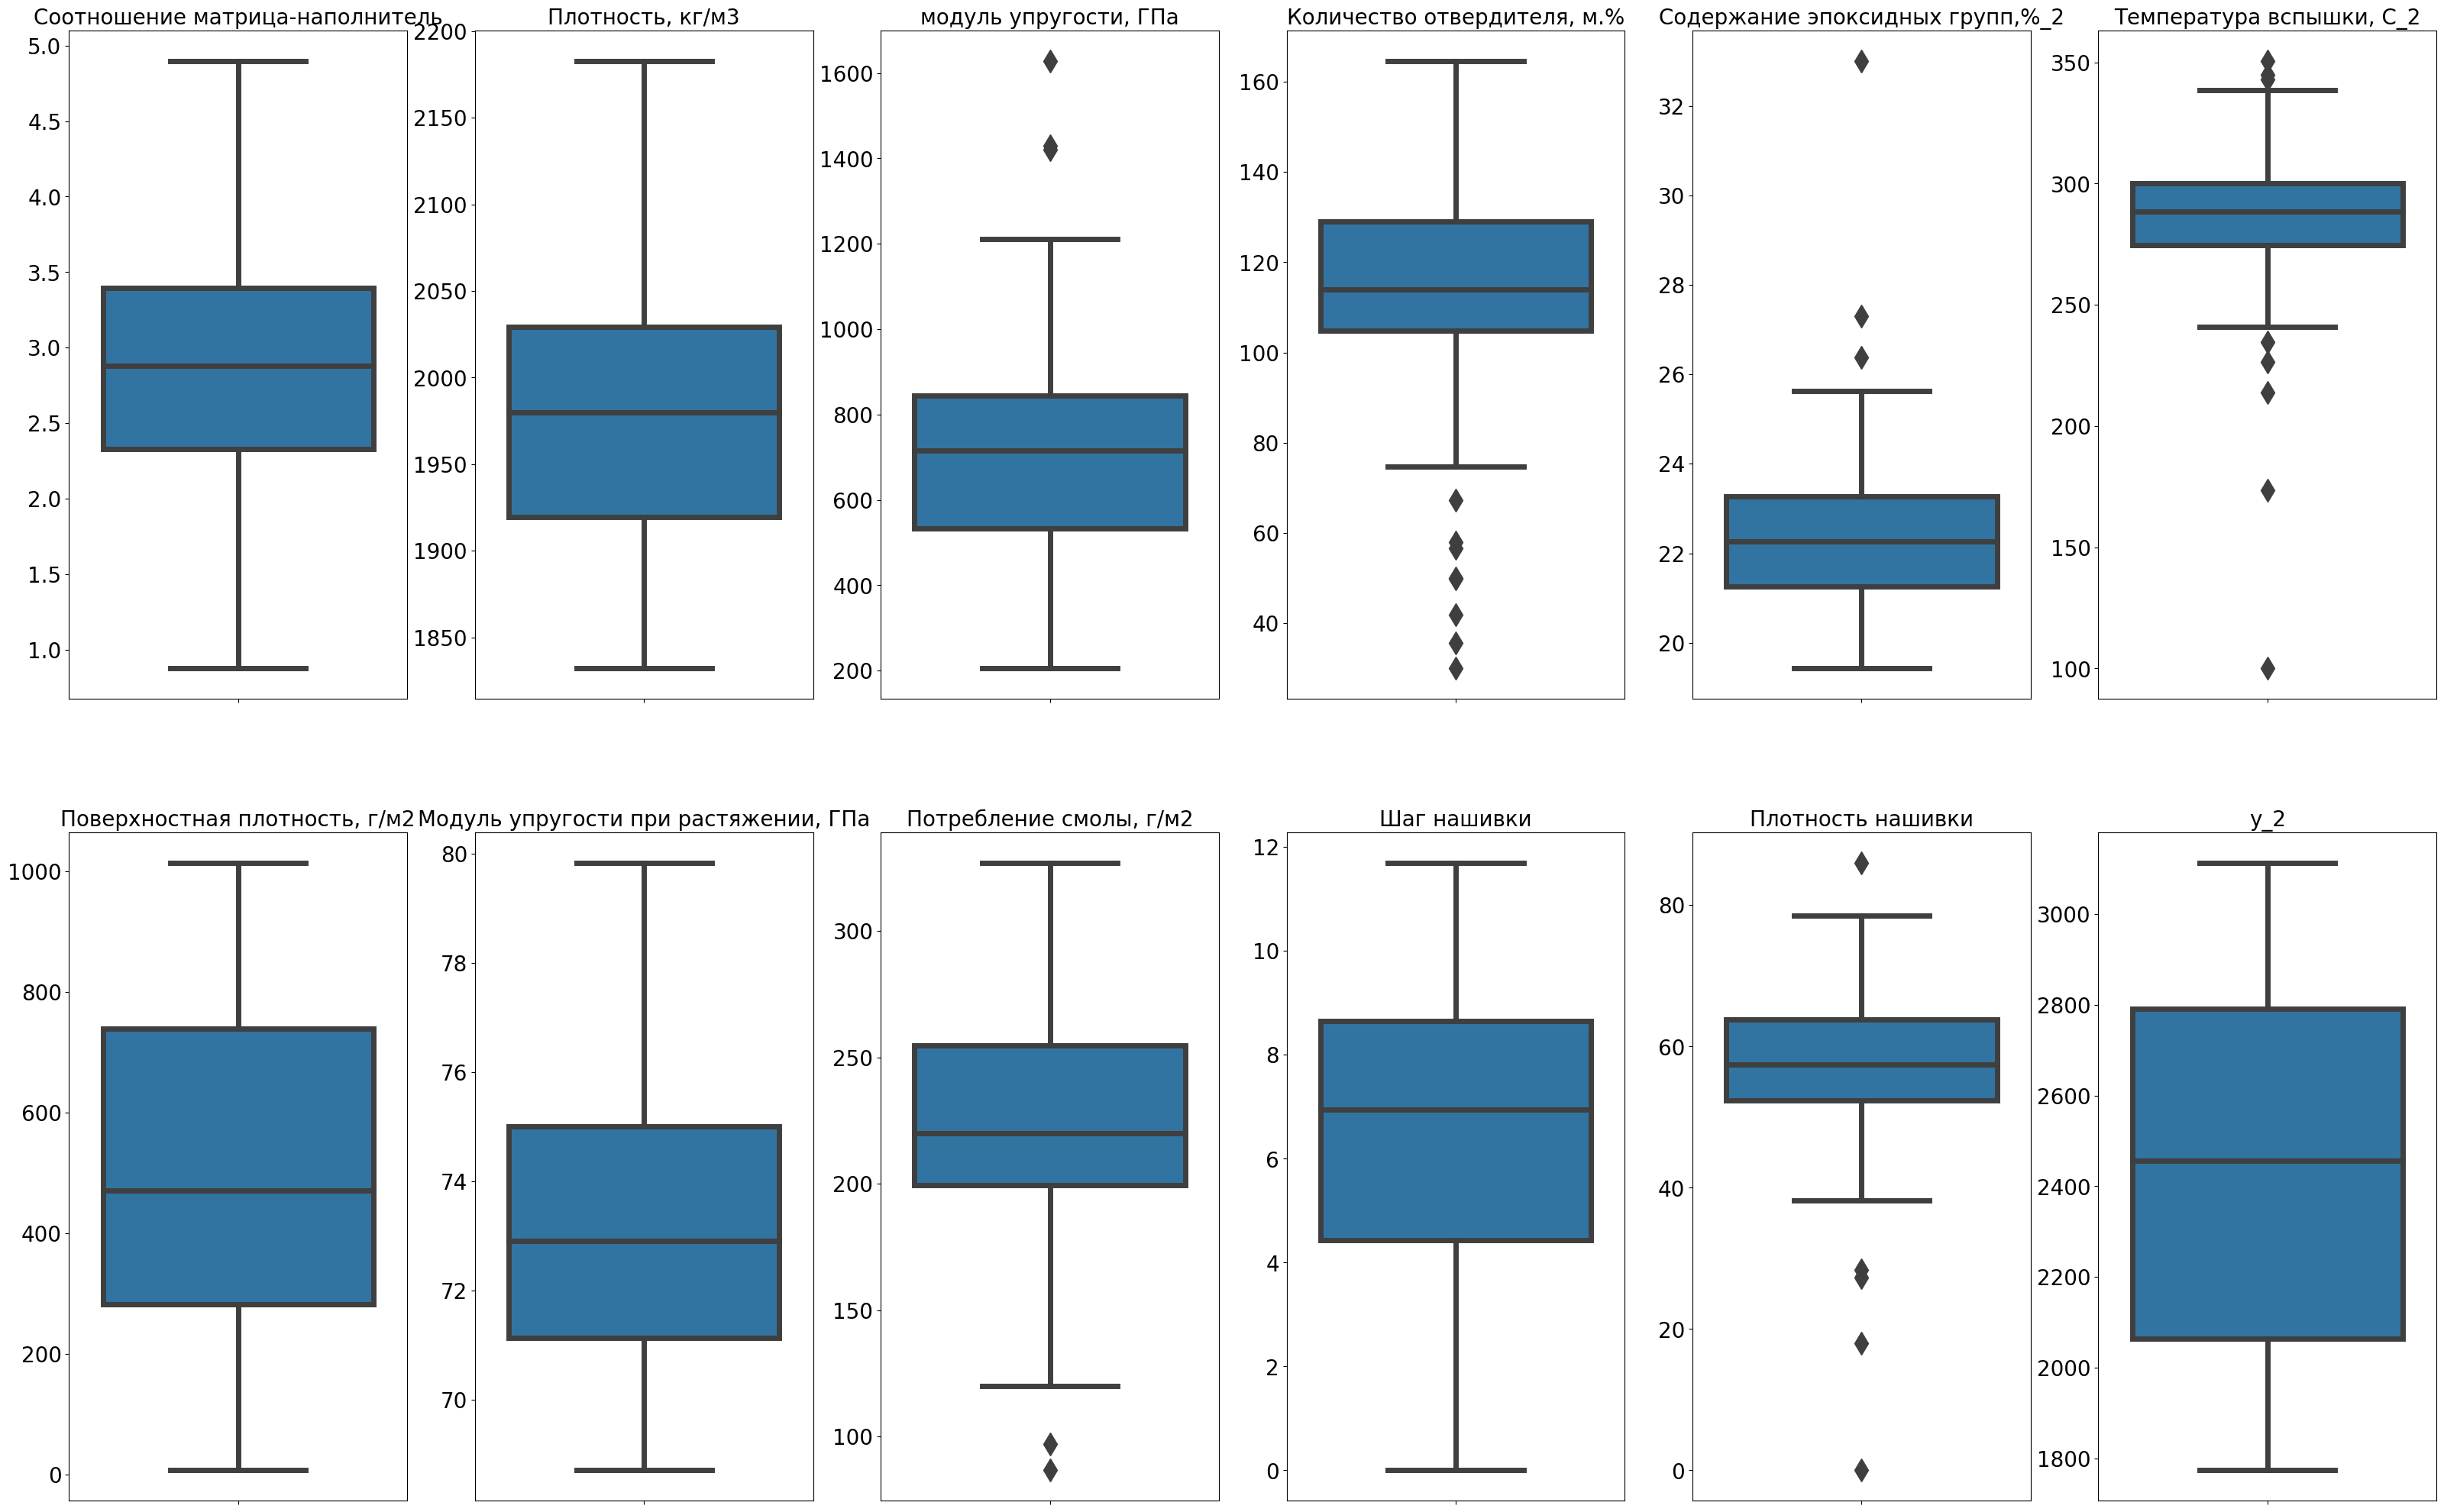

In [9]:
plt.figure(figsize=(40, 25))

for i, col in enumerate(df.drop('Угол нашивки, град', axis=1), start=1):
    plt.subplot(2, 6, i)
    sns.boxplot(data=df, y=col, fliersize=15, linewidth=5)
    # plt.setp(plt.gca().get_xticklabels(), fontsize=8)
    plt.setp(plt.gca().get_yticklabels(), fontsize=20)
    plt.title(col, size=20)
    plt.ylabel(None)

In [10]:
# sns.pairplot(df, kind="reg")
# plt.show()

3.2 Приведение к нормальному распределению (методом Йео-Джонсона)

In [11]:
pt = PowerTransformer(method='yeo-johnson', standardize=True)
columns_to_transform = df.columns.difference(['y_2', 'Угол нашивки, град'])
df[columns_to_transform] = pt.fit_transform(df[columns_to_transform])

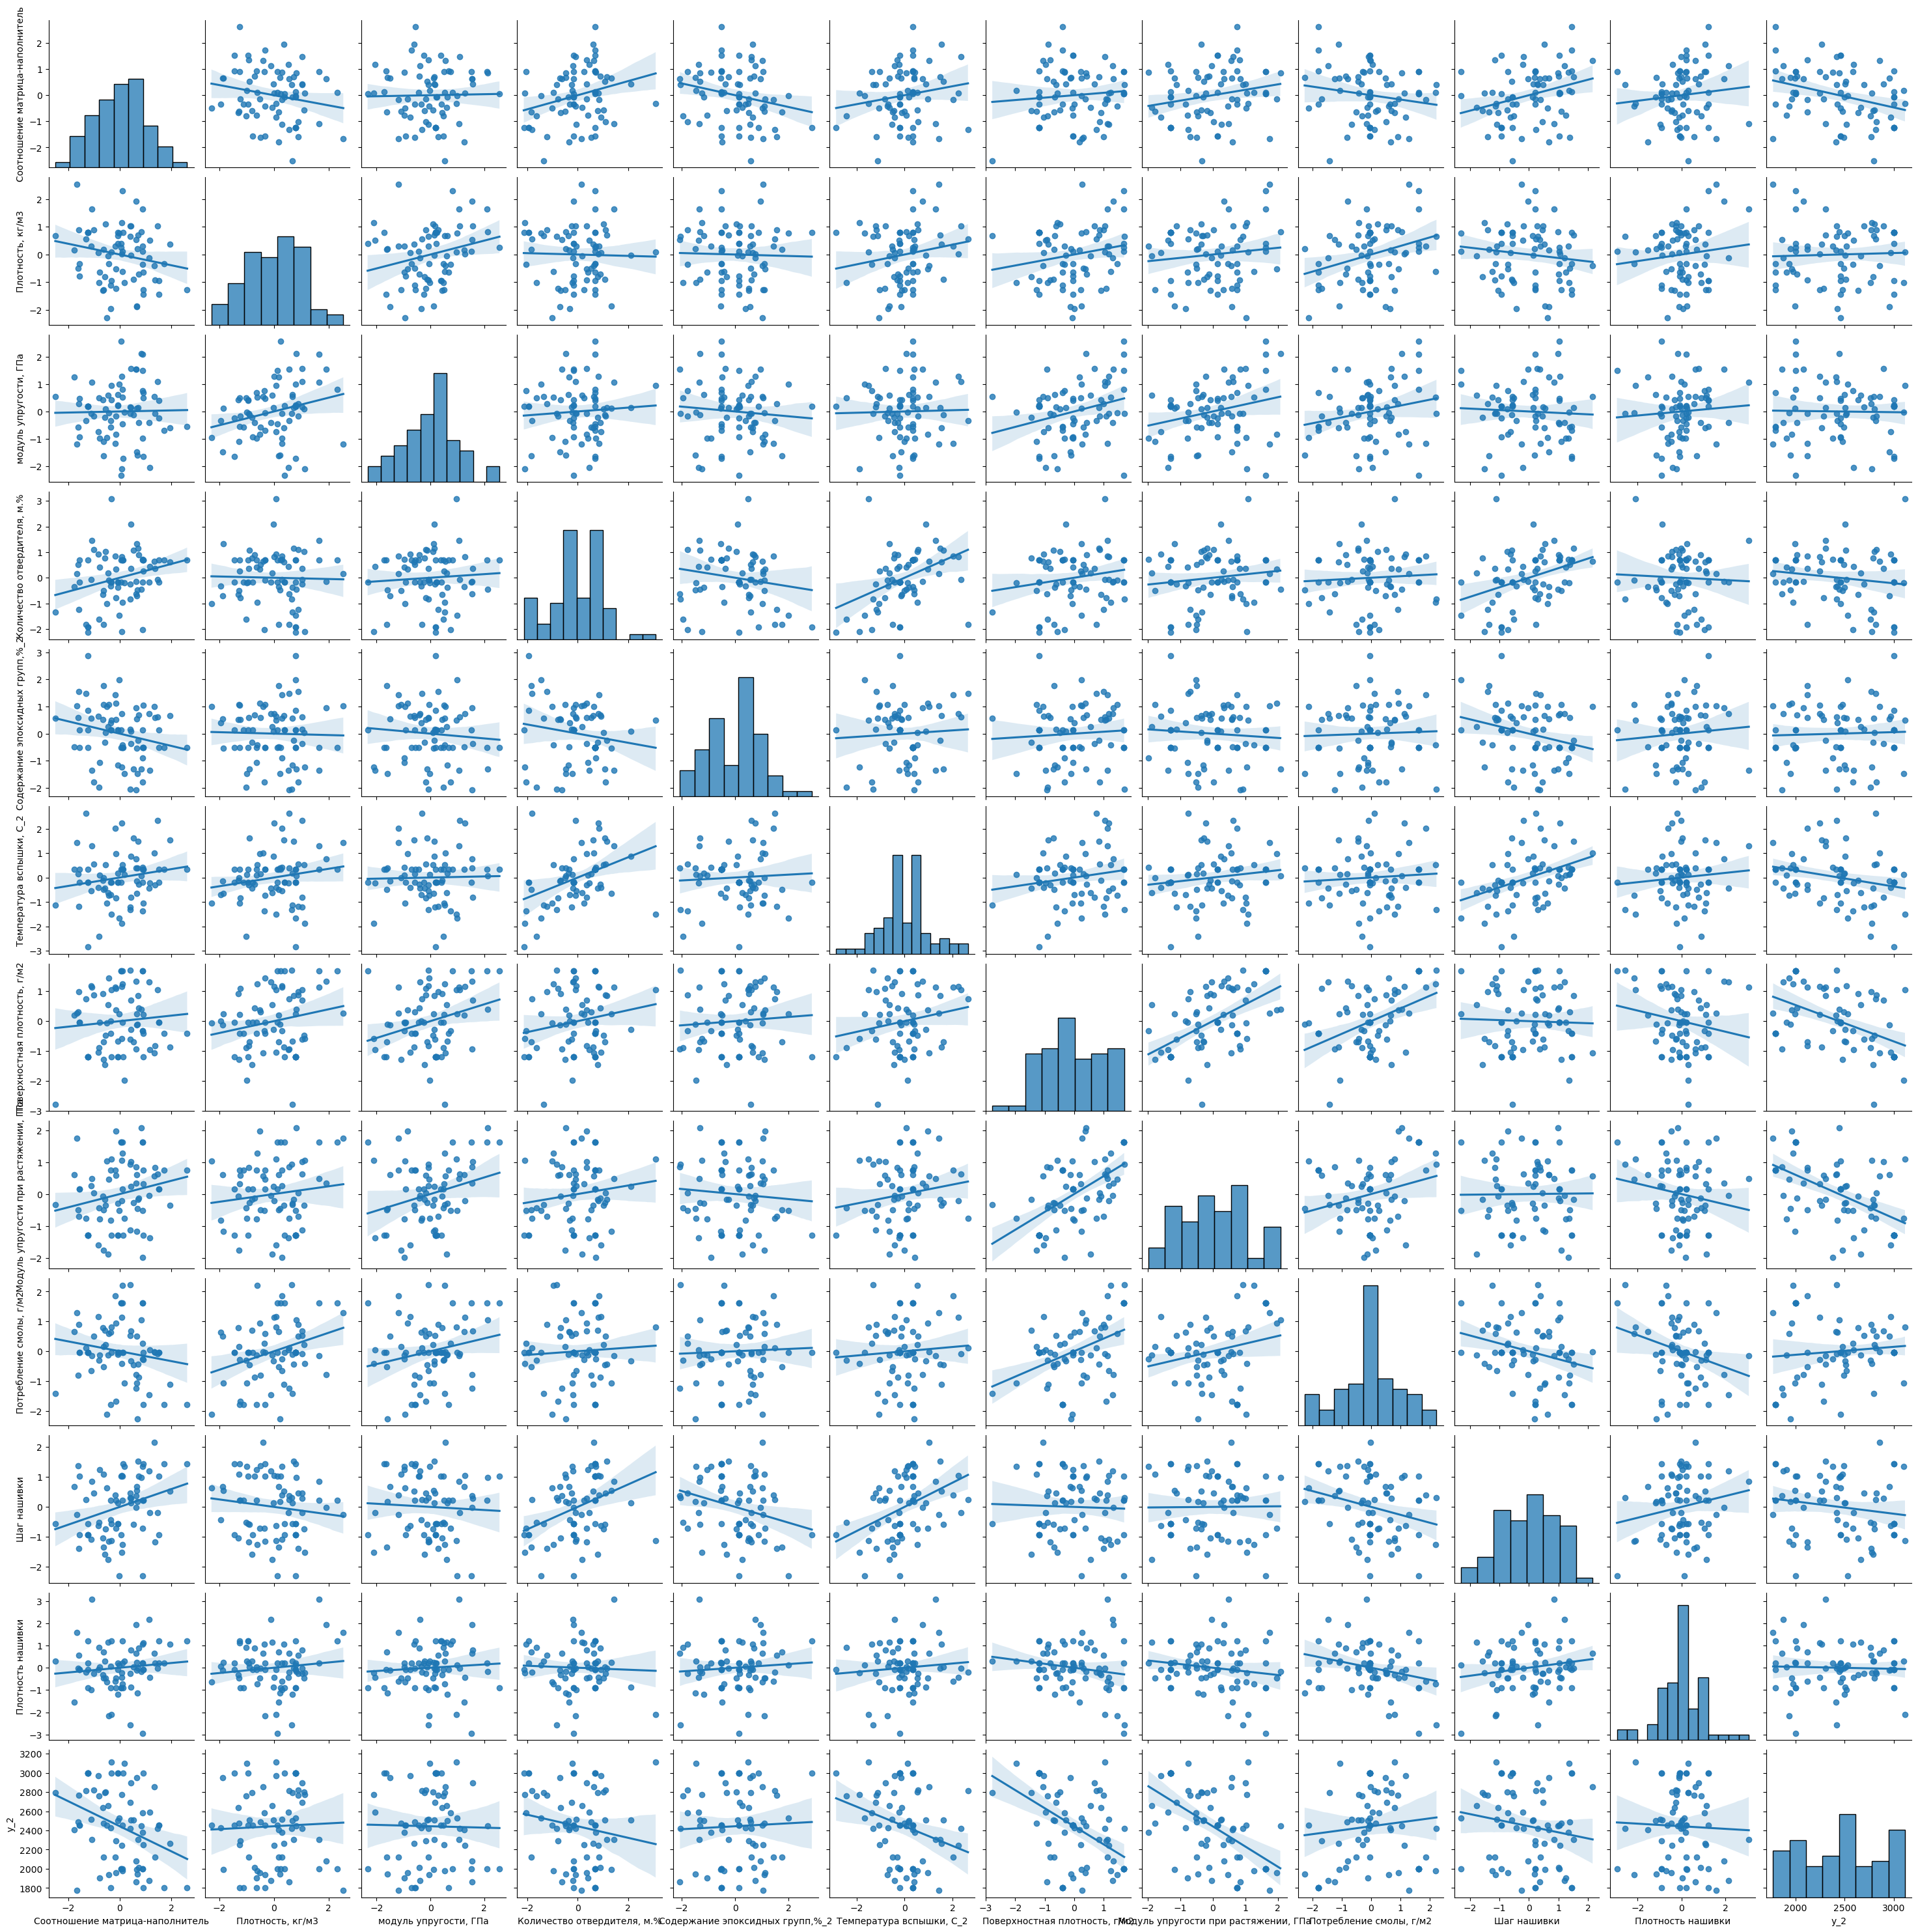

In [12]:
sns.pairplot(df.drop('Угол нашивки, град', axis=1), kind="reg")
plt.show()

4 Отбор признаков

In [13]:
x_0 = 'Соотношение матрица-наполнитель'
x_1 = 'Плотность, кг/м3'
x_2 = 'модуль упругости, ГПа'
x_3 = 'Количество отвердителя, м.%'
x_4 = 'Содержание эпоксидных групп,%_2'
x_5 = 'Температура вспышки, С_2'
x_6 = 'Поверхностная плотность, г/м2'
x_7 = 'Модуль упругости при растяжении, ГПа'
x_8 = 'Прочность при растяжении, МПа'
x_9 = 'Потребление смолы, г/м2'
x_10 = 'Угол нашивки, град'
x_11 = 'Шаг нашивки'
x_12 = 'Плотность нашивки'

4.1 Корреляционные матрицы

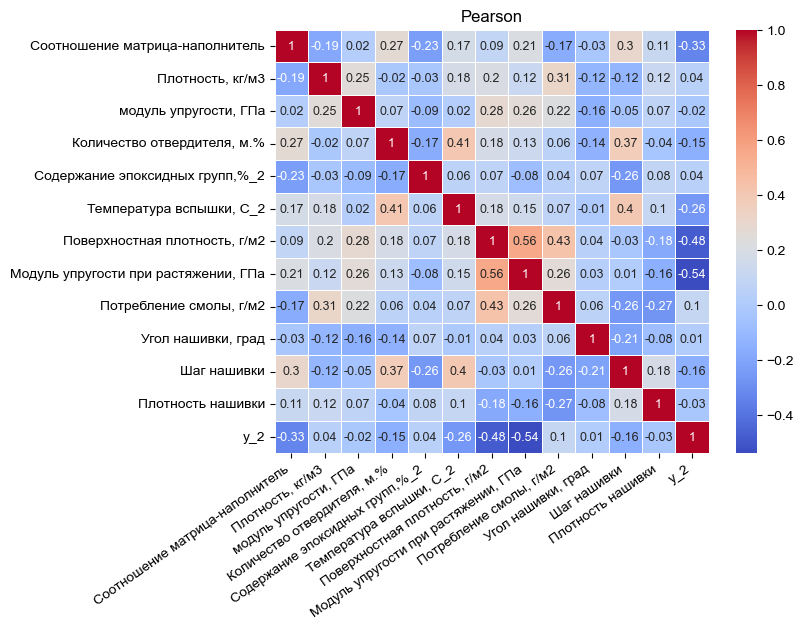

In [14]:
matrix = np.triu(df.corr())
plt.figure(figsize=(7, 5.5))
sns.heatmap(df.corr(method='pearson').round(2), annot=True, annot_kws={"fontsize": 9}, cmap='coolwarm', linewidth=.5)
sns.set(rc={"xtick.labelsize":10, "ytick.labelsize":10})
plt.xticks(rotation=35, ha='right')
plt.title('Pearson')
plt.show()

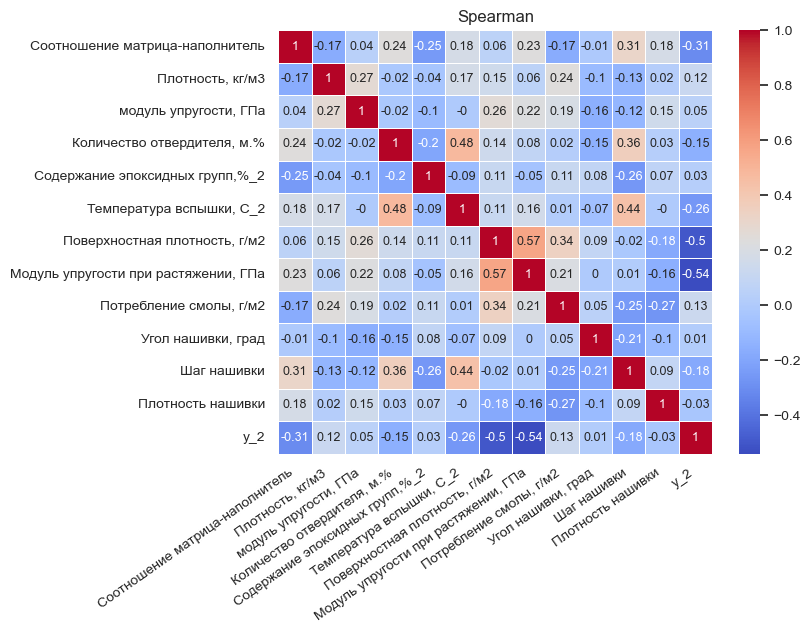

In [15]:
matrix = np.triu(df.corr())
plt.figure(figsize=(7, 5.5))
sns.heatmap(df.corr(method='spearman').round(2), annot=True, annot_kws={"fontsize": 9}, cmap='coolwarm', linewidth=.5)
sns.set(rc={"xtick.labelsize":10, "ytick.labelsize":10})
plt.xticks(rotation=35, ha='right')
plt.title('Spearman')
plt.show()

4.2 Вычисление (прогноз) коэффициента детерминации по коэф. корреляции Пирсона:  $R^2 = 1 - \frac{detA^+}{detA}$

In [16]:
corr_matrix_p = df.corr(method='pearson')
corr_matrix_s = df.corr(method='spearman')
# коэффициенты корреляции между y и x
corr_yx_p = corr_matrix_p['y_2'][:-1]
corr_yx_s = corr_matrix_s['y_2'][:-1]
# коэффициенты парной корреляции между x
corr_x_p = np.delete(np.array(corr_matrix_p), -1, axis=0)[:, :-1]
corr_x_s = np.delete(np.array(corr_matrix_s), -1, axis=0)[:, :-1]

det_r_yx_p = np.linalg.det(corr_matrix_p)
det_r_x_p = np.linalg.det(corr_matrix_p.iloc[:-1, :-1])
R2_P = 1 - det_r_yx_p / det_r_x_p

det_r_yx_s = np.linalg.det(corr_matrix_s)
det_r_x_s = np.linalg.det(corr_matrix_s.iloc[:-1, :-1])
R2_S = 1 - det_r_yx_s / det_r_x_s
print()
print(f"Прогноз коэф. детерминации R2 Pearson:  {R2_P.round(3)}")
print(f"Прогноз коэф. детерминации R2 Spearman: {R2_S.round(3)}")


Прогноз коэф. детерминации R2 Pearson:  0.523
Прогноз коэф. детерминации R2 Spearman: 0.556


In [17]:
X_2 = df.copy()
y_2 = X_2.pop('y_2')

4.3 Анализ значимости признаков

MI - показатель значимости любого (линейного и нелинейного) влияния признака (чем MI больше, тем больше признак влияет на целевую переменную);            
corr - коэф. корреляции Пирсона;                                                                                                                            
f - показатель значимости линейного влияния признака (чем f больше, тем больше признак влияет на целевую переменную);                                       
p - вероятность того, что целевая переменная не зависит от признака (показывает насколько верна гипотеза H0: "признак не влияет на целевую переменную")

In [18]:
mi_full = mutual_info_regression(X_2, y_2, random_state=2023)
f_full = f_regression(X_2, y_2)
f_p_full = pd.DataFrame({'MI':mi_full, 'corr':X_2.corrwith(y_2), 'f':f_full[0], 'p':f_full[1]}, index=X_2.columns)
f_p_full.round(3)

,MI,corr,f,p
Соотношение матрица-наполнитель,0.169,-0.331,9.129,0.003
"Плотность, кг/м3",0.194,0.038,0.106,0.746
"модуль упругости, ГПа",0.243,-0.018,0.025,0.875
"Количество отвердителя, м.%",0.000,-0.153,1.774,0.187
"Содержание эпоксидных групп,%_2",0.018,0.039,0.114,0.736
"Температура вспышки, С_2",0.234,-0.260,5.380,0.023
"Поверхностная плотность, г/м2",0.806,-0.479,22.014,0.000
"Модуль упругости при растяжении, ГПа",0.745,-0.535,29.706,0.000
"Потребление смолы, г/м2",0.659,0.105,0.821,0.368
"Угол нашивки, град",0.042,0.010,0.008,0.930


4.4 Анализ мультиколлинеарности признаков

In [19]:
def vif(df, features):    
    vif, tolerance = {}, {}
    for feature in features:
        X = [f for f in features if f != feature]
        X, y = df[X], df[feature]
        R2 = LinearRegression().fit(X, y).score(X, y)                
        tolerance[feature] = 1 - R2
        vif[feature] = 1 / (tolerance[feature])
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})
vif(df = df, features = df.columns)

,VIF,Tolerance
Соотношение матрица-наполнитель,1.359223,0.735714
"Плотность, кг/м3",1.398052,0.715281
"модуль упругости, ГПа",1.282628,0.779650
"Количество отвердителя, м.%",1.434400,0.697156
"Содержание эпоксидных групп,%_2",1.283241,0.779277
"Температура вспышки, С_2",1.653057,0.604940
"Поверхностная плотность, г/м2",2.194181,0.455751
"Модуль упругости при растяжении, ГПа",1.889938,0.529118
"Потребление смолы, г/м2",1.731703,0.577466
"Угол нашивки, град",1.140424,0.876867


4.5 Пошаговый отбор признаков (stepwise regression)

In [20]:
backselect = step_reg.backward_regression(X_2, y_2, 0.05, verbose=False)
forwardselect = step_reg.forward_regression(X_2, y_2, 0.05, verbose=False)
print(backselect)
print(forwardselect)

['Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа', 'Потребление смолы, г/м2']
['Модуль упругости при растяжении, ГПа', 'Потребление смолы, г/м2', 'Поверхностная плотность, г/м2']


#### В результате пошагового отбора рассматриваем следующие признаки:

In [21]:
df = df.loc[:, [x_0, x_3, x_5, x_6, x_7, x_9, x_11, 'y_2']]

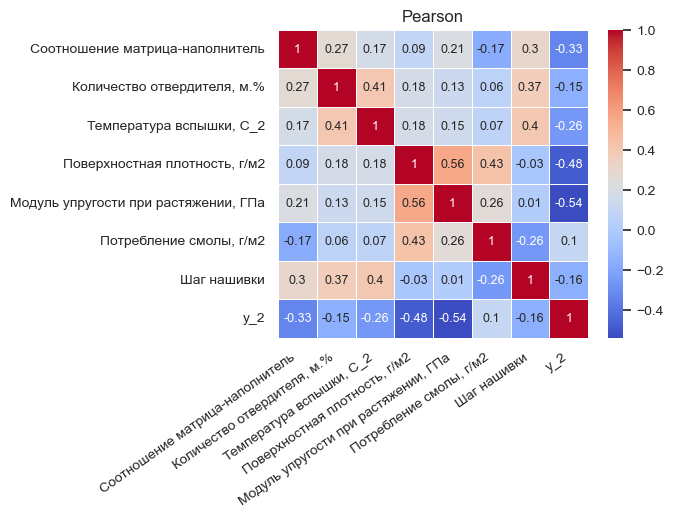

In [22]:
plt.figure(figsize=(5, 4))
sns.heatmap(df.corr(method='pearson').round(2), annot=True, annot_kws={"fontsize": 9}, cmap='coolwarm', linewidth=.5)
sns.set(rc={"xtick.labelsize":10, "ytick.labelsize":10})
plt.xticks(rotation=35, ha='right')
plt.title('Pearson')
plt.show()

5 Разделение датасета на train и test, масштабирование

In [23]:
X_2 = df.drop(['y_2'], axis=1)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_2, # X_poly - если использовать полиномиальную регрессию
                                                    y_2,
                                                    test_size=0.3,
                                                    random_state=42)
print(X_train.shape)
print(X_test.shape)

(53, 7)
(23, 7)


In [25]:
sc = RobustScaler()    # MinMaxScaler()    RobustScaler()    StandardScaler()
X_train_std = sc.fit_transform(X_train) 
X_test_std = sc.transform(X_test)

6 Вычисление (прогноз) коэффициента детерминации по коэф. корреляции Пирсона:  $R^2 = 1 - \frac{detA^+}{detA}$

In [26]:
df_train = pd.DataFrame(data=X_train_std, columns=X_2.columns)
df_train['y_2'] = y_train.reset_index(drop=True)
df_test = pd.DataFrame(data=X_test_std, columns=X_2.columns)
df_test['y_2'] = y_test.reset_index(drop=True)

corr_matrix_train = df_train.corr(method='pearson')
corr_matrix_test = df_test.corr(method='pearson')

corr_yx_train = corr_matrix_train['y_2'][:-1]    # коэффициенты корреляции между y и x
corr_yx_test = corr_matrix_test['y_2'][:-1]    # коэффициенты корреляции между y и x

corr_x_train = np.delete(np.array(corr_matrix_train), -1, axis=0)[:, :-1]    # коэффициенты парной корреляции между x
corr_x_test = np.delete(np.array(corr_matrix_test), -1, axis=0)[:, :-1]    # коэффициенты парной корреляции между x

det_r_yx_train = np.linalg.det(corr_matrix_train)
det_r_x_train = np.linalg.det(corr_matrix_train.iloc[:-1, :-1])
R2_train = 1 - det_r_yx_train / det_r_x_train
det_r_yx_test = np.linalg.det(corr_matrix_test)
det_r_x_test = np.linalg.det(corr_matrix_test.iloc[:-1, :-1])
R2_test = 1 - det_r_yx_test / det_r_x_test
print(f"Оценка R2 для full-выборки:  {R2_P.round(3)}")
print(f"Оценка R2 для train-выборки: {R2_train.round(3)}")
print(f"Оценка R2 для test-выборки:  {R2_test.round(3)}")

Оценка R2 для full-выборки:  0.523
Оценка R2 для train-выборки: 0.397
Оценка R2 для test-выборки:  0.812


#### 7 Обучение моделей

In [27]:
metrics = {}

7.1 LinearRegression

In [28]:
lr = LinearRegression()
model_lr = lr.fit(X_train, y_train)

y_lr_pred = model_lr.predict(X_test)
y_lr_pred_train = model_lr.predict(X_train)

rmse_lr_train = np.sqrt(mean_squared_error(y_train, y_lr_pred_train)).round(3)
rmse_lr_test = np.sqrt(mean_squared_error(y_test, y_lr_pred)).round(3)
mae_lr_train = mean_absolute_error(y_train, y_lr_pred_train).round(3)
mae_lr_test = mean_absolute_error(y_test, y_lr_pred).round(3)
r2_lr_train = r2_score(y_train, y_lr_pred_train).round(3)
r2_lr_test = r2_score(y_test, y_lr_pred).round(3)
metrics['LinearRegression'] = (rmse_lr_train, rmse_lr_test, mae_lr_train, mae_lr_test, r2_lr_train, r2_lr_test)

print(f'RMSE train: {rmse_lr_train}')
print(f'RMSE test:  {rmse_lr_test}')
print()
print(f'MAE train:  {mae_lr_train}')
print(f'MAE test:   {mae_lr_test}')
print()
print(f'R2 train:   {r2_lr_train}')
print(f'R2 test:    {r2_lr_test}')
print()
print('Коэффициенты регрессии:')
print(pd.DataFrame(model_lr.coef_[:], index=X_2.columns, columns=['k']).round(5))
print()
print(f'Свободный член регрессии  a0 =  {model_lr.intercept_.round(3)}')

RMSE train: 305.22
RMSE test:  218.242

MAE train:  250.507
MAE test:   184.585

R2 train:   0.397
R2 test:    0.689

Коэффициенты регрессии:
                                              k
Соотношение матрица-наполнитель       -34.64518
Количество отвердителя, м.%            25.49505
Температура вспышки, С_2              -56.98157
Поверхностная плотность, г/м2        -139.42096
Модуль упругости при растяжении, ГПа -135.57109
Потребление смолы, г/м2               136.68271
Шаг нашивки                           -20.31711

Свободный член регрессии  a0 =  2462.735


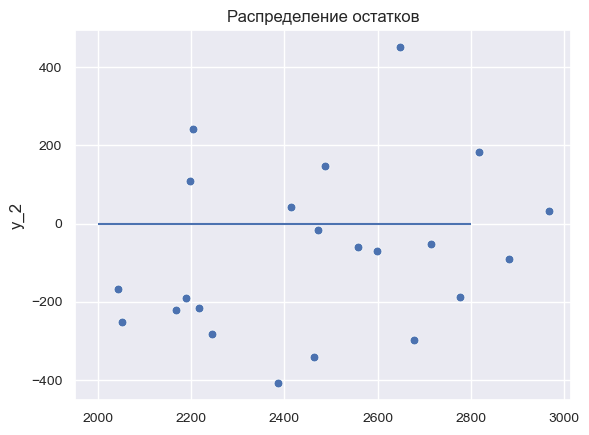

In [29]:
sns.scatterplot(x = y_lr_pred, y = y_test - y_lr_pred, s = 40)
plt.hlines(y = 0, xmin = 2000, xmax = 3000)
plt.title('Распределение остатков')
plt.show()

7.2 ElasticNet

In [30]:
en = ElasticNet()
en_parameters = {'alpha': (0.01, 0.03, 0.1, 0.3, 1, 3, 10), 
                 'l1_ratio': (0.05, 0.1, 0.3, 0.5, 0.7, 0.9),
                 'random_state':[1, 7, 42, 100]
}
model_en = GridSearchCV(estimator=en,
                   param_grid=en_parameters,
                   scoring='r2', # 'neg_mean_absolute_error'
                   n_jobs=-1,
                   cv=10)
model_en.fit(X_train_std, y_train)

y_en_pred = model_en.predict(X_test_std)
y_en_pred_train = model_en.predict(X_train_std)

rmse_en_train = np.sqrt(mean_squared_error(y_train, y_en_pred_train)).round(3)
rmse_en_test = np.sqrt(mean_squared_error(y_test, y_en_pred)).round(3)
mae_en_train = mean_absolute_error(y_train, y_en_pred_train).round(3)
mae_en_test = mean_absolute_error(y_test, y_en_pred).round(3)
r2_en_train = r2_score(y_train, y_en_pred_train).round(3)
r2_en_test = r2_score(y_test, y_en_pred).round(3)
metrics['ElasticNet'] = (rmse_en_train, rmse_en_test, mae_en_train, mae_en_test, r2_en_train, r2_en_test)

print(f'RMSE train: {rmse_en_train}')
print(f'RMSE test:  {rmse_en_test}')
print()
print(f'MAE train:  {mae_en_train}')
print(f'MAE test:   {mae_en_test}')
print()
print(f'R2 train:   {r2_en_train}')
print(f'R2 test:    {r2_en_test}')
model_en.best_params_

RMSE train: 328.577
RMSE test:  279.078

MAE train:  273.713
MAE test:   224.106

R2 train:   0.302
R2 test:    0.492


{'alpha': 1, 'l1_ratio': 0.5, 'random_state': 1}

7.3 GradientBoostingRegressor

In [31]:
gbr = GradientBoostingRegressor()
gbr_parameters = {
    'n_estimators' : range(100, 600, 100),
    'criterion' : ['friedman_mse', 'squared_error'],
    'max_depth' : range(1, 8),
    'min_samples_leaf' : range(2, 4),
    'min_samples_split' : range(4, 8, 2),
    'random_state':[1147, 7, 42, 100]
}
model_gbr = GridSearchCV(estimator=gbr,
                   param_grid=gbr_parameters,
                   scoring='r2', # 'neg_mean_absolute_error'
                   n_jobs=-1,
                   cv=10)
model_gbr.fit(X_train_std, y_train)

y_gbr_pred = model_gbr.predict(X_test_std)
y_gbr_pred_train = model_gbr.predict(X_train_std)

rmse_gbr_train = np.sqrt(mean_squared_error(y_train, y_gbr_pred_train)).round(3)
rmse_gbr_test = np.sqrt(mean_squared_error(y_test, y_gbr_pred)).round(3)
mae_gbr_train = mean_absolute_error(y_train, y_gbr_pred_train).round(3)
mae_gbr_test = mean_absolute_error(y_test, y_gbr_pred).round(3)
r2_gbr_train = r2_score(y_train, y_gbr_pred_train).round(3)
r2_gbr_test = r2_score(y_test, y_gbr_pred).round(3)
metrics['GradientBoosting'] = (rmse_gbr_train, rmse_gbr_test, mae_gbr_train, mae_gbr_test, r2_gbr_train, r2_gbr_test)

print(f'RMSE train: {rmse_gbr_train}')
print(f'RMSE test:  {rmse_gbr_test}')
print()
print(f'MAE train:  {mae_gbr_train}')
print(f'MAE test:   {mae_gbr_test}')
print()
print(f'R2 train:   {r2_gbr_train}')
print(f'R2 test:    {r2_gbr_test}')
model_gbr.best_params_

RMSE train: 13.572
RMSE test:  215.996

MAE train:  9.441
MAE test:   147.108

R2 train:   0.999
R2 test:    0.696


{'criterion': 'friedman_mse',
 'max_depth': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 100,
 'random_state': 42}

7.4 RandomForestRegressor

In [32]:
rfr = RandomForestRegressor()
rfr_parameters = {
    'n_estimators' : range(100, 400, 100),
    'criterion' : ['squared_error', 'absolute_error'],
    'max_depth' : range(1, 8),
    'min_samples_leaf' : range(2, 4),
    'min_samples_split' : range(4, 8, 2),
    'random_state':[1, 7, 42, 1147]
}
model_rfr = GridSearchCV(estimator=rfr,
                   param_grid=rfr_parameters,
                   scoring='r2', # 'neg_mean_absolute_error'
                   n_jobs=-1,
                   cv=10)
model_rfr.fit(X_train_std, y_train)

y_rfr_pred = model_rfr.predict(X_test_std)
y_rfr_pred_train = model_rfr.predict(X_train_std)

rmse_rfr_train = np.sqrt(mean_squared_error(y_train, y_rfr_pred_train)).round(3)
rmse_rfr_test = np.sqrt(mean_squared_error(y_test, y_rfr_pred)).round(3)
mae_rfr_train = mean_absolute_error(y_train, y_rfr_pred_train).round(3)
mae_rfr_test = mean_absolute_error(y_test, y_rfr_pred).round(3)
r2_rfr_train = r2_score(y_train, y_rfr_pred_train).round(3)
r2_rfr_test = r2_score(y_test, y_rfr_pred).round(3)
metrics['RandomForest'] = (rmse_rfr_train, rmse_rfr_test, mae_rfr_train, mae_rfr_test, r2_rfr_train, r2_rfr_test)

print(f'RMSE train: {rmse_rfr_train}')
print(f'RMSE test:  {rmse_rfr_test}')
print()
print(f'MAE train:  {mae_rfr_train}')
print(f'MAE test:   {mae_rfr_test}')
print()
print(f'R2 train:   {r2_rfr_train}')
print(f'R2 test:    {r2_rfr_test}')
model_rfr.best_params_

RMSE train: 141.713
RMSE test:  201.014

MAE train:  107.15
MAE test:   141.756

R2 train:   0.87
R2 test:    0.737


{'criterion': 'squared_error',
 'max_depth': 6,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 200,
 'random_state': 7}

7.5 KNeighborsRegressor

In [33]:
knr = KNeighborsRegressor()
knr_parameters = {'n_neighbors' : range(1, 101, 2), 
          # 'weights' : ['uniform', 'distance'],
          # 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
}
model_knr = GridSearchCV(estimator=knr,
                   param_grid=knr_parameters,
                   scoring='r2', # 'neg_mean_absolute_error'
                   n_jobs=-1,
                   cv=10)
model_knr.fit(X_train_std, y_train)

y_knr_pred = model_knr.predict(X_test_std)
y_knr_pred_train = model_knr.predict(X_train_std)

rmse_knr_train = np.sqrt(mean_squared_error(y_train, y_knr_pred_train)).round(3)
rmse_knr_test = np.sqrt(mean_squared_error(y_test, y_knr_pred)).round(3)
mae_knr_train = mean_absolute_error(y_train, y_knr_pred_train).round(3)
mae_knr_test = mean_absolute_error(y_test, y_knr_pred).round(3)
r2_knr_train = r2_score(y_train, y_knr_pred_train).round(3)
r2_knr_test = r2_score(y_test, y_knr_pred).round(3)
metrics['KNeighbors'] = (rmse_knr_train, rmse_knr_test, mae_knr_train, mae_knr_test, r2_knr_train, r2_knr_test)

print(f'RMSE train: {rmse_knr_train}')
print(f'RMSE test:  {rmse_knr_test}')
print()
print(f'MAE train:  {mae_knr_train}')
print(f'MAE test:   {mae_knr_test}')
print()
print(f'R2 train:   {r2_knr_train}')
print(f'R2 test:    {r2_knr_test}')
model_knr.best_params_

RMSE train: 215.962
RMSE test:  233.783

MAE train:  174.451
MAE test:   189.464

R2 train:   0.698
R2 test:    0.644


{'n_neighbors': 3}

7.6 TheilSenRegressor

In [34]:
tsr = TheilSenRegressor()
tsr_parameters = {
    'random_state':[1, 7, 42, 100]
}
model_tsr = GridSearchCV(estimator=tsr,
                   param_grid=tsr_parameters,
                   scoring='r2', # 'neg_mean_absolute_error'
                   n_jobs=-1,
                   cv=10)
model_tsr.fit(X_train_std, y_train)

y_tsr_pred = model_tsr.predict(X_test_std)
y_tsr_pred_train = model_tsr.predict(X_train_std)

rmse_tsr_train = np.sqrt(mean_squared_error(y_train, y_tsr_pred_train)).round(3)
rmse_tsr_test = np.sqrt(mean_squared_error(y_test, y_tsr_pred)).round(3)
mae_tsr_train = mean_absolute_error(y_train, y_tsr_pred_train).round(3)
mae_tsr_test = mean_absolute_error(y_test, y_tsr_pred).round(3)
r2_tsr_train = r2_score(y_train, y_tsr_pred_train).round(3)
r2_tsr_test = r2_score(y_test, y_tsr_pred).round(3)
metrics['TheilSen'] = (rmse_tsr_train, rmse_tsr_test, mae_tsr_train, mae_tsr_test, r2_tsr_train, r2_tsr_test)

print(f'RMSE train: {rmse_tsr_train}')
print(f'RMSE test:  {rmse_tsr_test}')
print()
print(f'MAE train:  {mae_tsr_train}')
print(f'MAE test:   {mae_tsr_test}')
print()
print(f'R2 train:   {r2_tsr_train}')
print(f'R2 test:    {r2_tsr_test}')
model_tsr.best_params_

RMSE train: 310.517
RMSE test:  221.547

MAE train:  257.466
MAE test:   187.071

R2 train:   0.376
R2 test:    0.68


{'random_state': 1}

8. Сводная таблица метрик моделей

In [35]:
df_metrics = pd.DataFrame(metrics)
df_metrics.index = ['RMSE train', 'RMSE test', 'MAE train', 'MAE test', 'R2 train', 'R2 test']
df_metrics

,LinearRegression,ElasticNet,GradientBoosting,RandomForest,KNeighbors,TheilSen
RMSE train,305.220,328.577,13.572,141.713,215.962,310.517
RMSE test,218.242,279.078,215.996,201.014,233.783,221.547
MAE train,250.507,273.713,9.441,107.150,174.451,257.466
MAE test,184.585,224.106,147.108,141.756,189.464,187.071
R2 train,0.397,0.302,0.999,0.870,0.698,0.376
R2 test,0.689,0.492,0.696,0.737,0.644,0.680


9. Доверительный интервал для предсказаний лучшей модели

In [36]:
y_pred = y_rfr_pred

In [37]:
n = len(y_test)
p = len(X_test_std[0])
se = np.sqrt(np.sum((y_test - y_pred)**2) / (n - p))

# Уровень доверия
confidence_level = 0.95
t_value = stats.t.ppf((1 + confidence_level) / 2, n - p)

lower = y_pred - t_value * se
upper = y_pred + t_value * se

y_test = y_test.values
print("Доверительный интервал для прогноза:")
print(f"Нижняя граница:  {lower[:8].round(2)}")
print(f"y_test:          {y_test[:8].round(2)}")
print(f"y_pred:          {y_pred[:8].round(2)}")
print(f"Верхняя граница: {upper[:8].round(2)}")
print()
print(f"Разброс тестовых значений:       {y_test.min().round(2)}; {y_test.max().round(2)}")
print(f"Разброс предсказанных значений:  {y_pred.min().round(2)}; {y_pred.max().round(2)}")
print()
print(f"Наименьшая нижняя граница доверительного интервала:  {lower.min().round(2)}")
print(f"Набольшая верхняя граница доверительного интервала:  {upper.max().round(2)}")

Доверительный интервал для прогноза:
Нижняя граница:  [2407.21 1841.02 1525.51 2424.27 1664.32 1571.1  1867.28 1726.62]
y_test:          [3000.   2379.63 2000.   3000.   1946.22 1876.14 2305.24 1978.78]
y_pred:          [2918.12 2351.94 2036.42 2935.19 2175.23 2082.02 2378.19 2237.53]
Верхняя граница: [3429.04 2862.85 2547.34 3446.1  2686.15 2592.93 2889.1  2748.45]

Разброс тестовых значений:       1800.0; 3099.28
Разброс предсказанных значений:  1876.62; 2935.19

Наименьшая нижняя граница доверительного интервала:  1365.71
Набольшая верхняя граница доверительного интервала:  3446.1


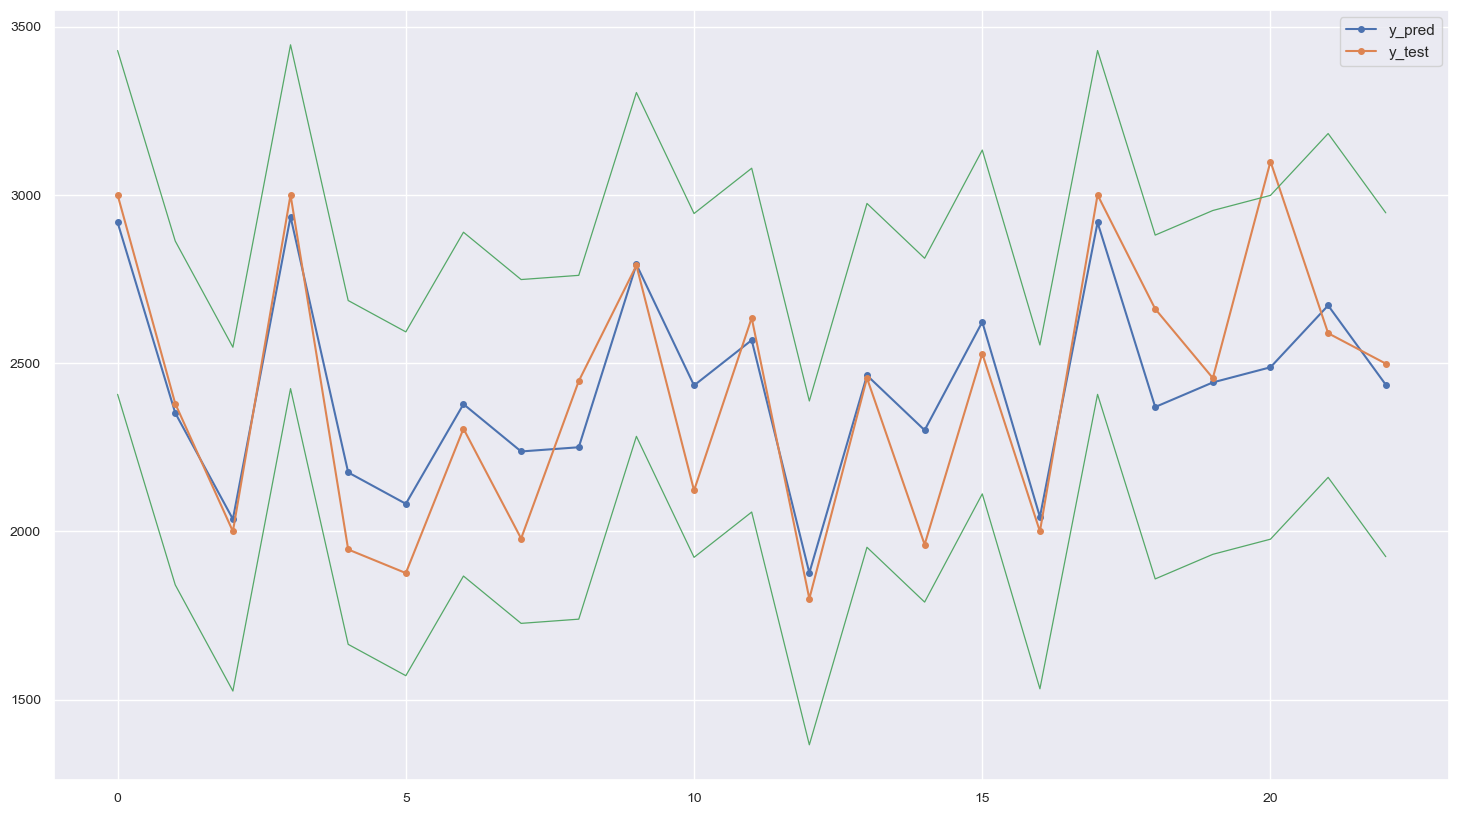

In [38]:
plt.figure(figsize=(18, 10))
plt.plot(y_pred, label='y_pred', marker='o', markersize=4)
plt.plot(y_test, label='y_test', marker='o', markersize=4)
plt.plot(lower, linewidth = 0.9, color='g')
plt.plot(upper, linewidth = 0.9, color='g')
plt.legend()
plt.grid(True)
plt.show()

Дополнение. Сравнение метрик различных регрессоров с использованием LazyRegressor

In [39]:
from lazypredict.Supervised import LazyRegressor

reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train_std, X_test_std, y_train, y_test)

print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:01<00:00, 22.26it/s]

                               Adjusted R-Squared  R-Squared    RMSE  \
Model                                                                  
RandomForestRegressor                        0.68       0.78  182.04   
XGBRegressor                                 0.59       0.72  206.56   
HuberRegressor                               0.59       0.72  208.13   
PassiveAggressiveRegressor                   0.55       0.69  217.19   
SGDRegressor                                 0.55       0.69  218.12   
LinearRegression                             0.54       0.69  218.24   
TransformedTargetRegressor                   0.54       0.69  218.24   
Lars                                         0.54       0.69  218.24   
Lasso                                        0.54       0.69  218.56   
Ridge                                        0.54       0.69  219.08   
PoissonRegressor                             0.54       0.68  220.47   
LassoLars                                    0.53       0.68  22